In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
import urllib
import csv

import sklearn
from sklearn import svm, datasets
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn import metrics
from sklearn.metrics import accuracy_score

from itertools import cycle
from scipy import interp

In [37]:
X_train = np.loadtxt(open("train/out_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("train/out_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("test/out_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("test/out_classes_0.txt", "rb"), delimiter=",", skiprows=0)

In [38]:
# confusion matrices
# code initially taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

class_names = ['positive (1)', 'negative (0)'];

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
def make_confusion_matrix(y_test, y_pred):

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

#     # Plot normalized confusion matrix
#     plt.figure()
#     plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                           title='Normalized confusion matrix')

    plt.show()

In [40]:
# initial code take from: https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/
def make_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

0.503333333333
Confusion matrix, without normalization
[[292   8]
 [290  10]]


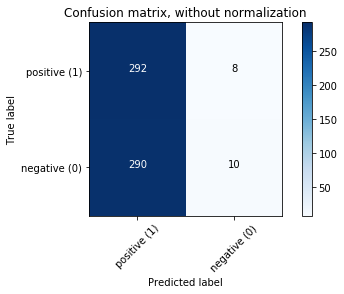

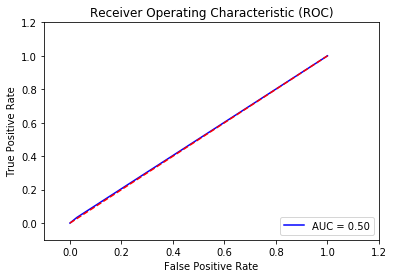

In [41]:
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, y_train)
#print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred)
make_roc_curve(y_test, y_pred)

MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

y_expect = y_test
y_pred = MultiNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

make_confusion_matrix(y_test, y_pred)
make_roc_curve(y_test, y_pred

GaussianNB(priors=None)
0.705
Confusion matrix, without normalization
[[168 132]
 [ 45 255]]


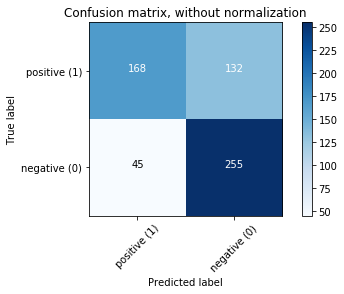

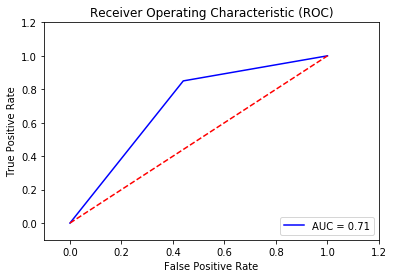

In [42]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

y_expect = y_test
y_pred = GausNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred)
make_roc_curve(y_test, y_pred)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.773333333333
Confusion matrix, without normalization
[[240  60]
 [ 76 224]]


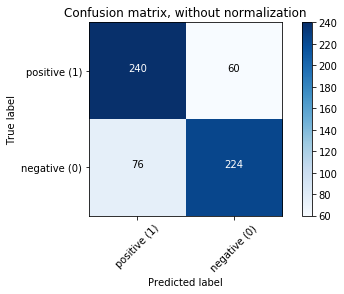

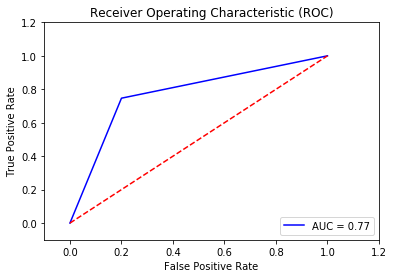

In [43]:
BernNB = BernoulliNB(binarize = 0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

make_confusion_matrix(y_test, y_pred)
make_roc_curve(y_test, y_pred)